# Intro to HTS data
In this exercise will cover the following:

 - File formats (FASTQ, SAM/BAM, VCF)
 - Mapping (single-end, paired-end) NGS data to a reference sequence
 - Read flags
 - VERY IMPORTANT, you need to identify the 'pipe' button on your computer '|'. That is the character that looks like a vertical bar, on a standard American keyboard this can be found by pressing shift+'button left of enter' or 'button above enter
 

In this exercise you will align a fastq file using bwa and generate a SAM file.

Due to the computational time we have created a reduced genome from one of the individual. The individual is a wildebeest. The individual, CTauTzS_8872, has been sequenced using short read sequencing. For this exercise we have created a reduced reference genome.
Because we do not have a high quality and well annotated reference genome then we will map it to the goat genome. 

The fastQ file CCTauTzS_8872.Goat.small.fq_1.gz has variable name with *_1.fq.gz  which is first read or the read pair.  
 
 
 ### Running jupyter
 use Ctrl+ENTER to run code. 
 

** Please ignore the error: **

**`zmq.error.ZMQError: Address already in use (addr='tcp://127.0.0.1:xxxx')`**

In [1]:
# shared tools and data folder
source /home/student/USER/miniconda.sh
conda activate anders
TOOL_PATH=/home/student/opt/anders # for standalone tool script including java package
SHARED_PATH=/home/tch_wyd/myname/shared # For reference database
INPUT_PATH=/home/tch_wyd/myname/inputs/NGSIntro  # for input data

(base) (anders) (anders) (anders) (anders) 


In [2]:
# JAVA program
PICARD=${TOOL_PATH}/picard.jar

echo --programs that are installed:--
which samtools
which bwa
which angsd
which bcftools
ls $PICARD

echo; echo -Datasets that will be used-
echo ---pair of fastQ files
ls ${INPUT_PATH}/fastq/CCTauTzS_8872.Goat.small.fq_1.gz
ls ${INPUT_PATH}/fastq/CCTauTzS_8872.Goat.small.fq_2.gz

echo ---reference genome with index
ls ${INPUT_PATH}/goat/goat.fa.gz*

echo ""
echo "# if you don't have files like *.bwt, *.pac, you might have to build the index"
echo "# bwa index ${INPUT_PATH}/goat/goat.fa.gz"

(anders) (anders) (anders) --programs that are installed:--
(anders) /home/student/miniconda3/envs/anders/bin/samtools
(anders) /home/student/miniconda3/envs/anders/bin/bwa
(anders) /home/student/miniconda3/envs/anders/bin/angsd
(anders) /home/student/miniconda3/envs/anders/bin/bcftools
(anders) /home/student/opt/anders/picard.jar
(anders) (anders) 
-Datasets that will be used-
(anders) ---pair of fastQ files
(anders) /home/tch_wyd/myname/inputs/NGSIntro/fastq/CCTauTzS_8872.Goat.small.fq_1.gz
(anders) /home/tch_wyd/myname/inputs/NGSIntro/fastq/CCTauTzS_8872.Goat.small.fq_2.gz
(anders) (anders) ---reference genome with index
(anders) /home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.amb
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.ann
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.bwt
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.pac
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.sa
(anders) (anders) 
(an

First make a folder for the exercise and had a symbolic link to the reference genomes and the fastQ files

In [3]:
#make folder 
mkdir -p ~/sysu_day2_ngsintro

# enter folder
cd ~/sysu_day2_ngsintro

##make links to files and add them to the folder
# links to the two fastQ files
cp -sf ${INPUT_PATH}/fastq/CCTauTzS_8872.Goat.small.fq_1.gz .
cp -sf ${INPUT_PATH}/fastq/CCTauTzS_8872.Goat.small.fq_2.gz .

# like to reference genome with index
cp -sf ${INPUT_PATH}/goat/goat.fa.gz* .
cp -sf ${SHARED_PATH}/quiz*.json .


echo --- files in folder ---
ls ${INPUT_PATH}/fastq/CCTauTzS_8872.Goat.small.fq_1.gz ${INPUT_PATH}/fastq/CCTauTzS_8872.Goat.small.fq_2.gz ${INPUT_PATH}/goat/goat.fa.gz*


(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) --- files in folder ---
(anders) /home/tch_wyd/myname/inputs/NGSIntro/fastq/CCTauTzS_8872.Goat.small.fq_1.gz
/home/tch_wyd/myname/inputs/NGSIntro/fastq/CCTauTzS_8872.Goat.small.fq_2.gz
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.amb
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.ann
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.bwt
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.pac
/home/tch_wyd/myname/inputs/NGSIntro/goat/goat.fa.gz.sa
(anders) 


In [4]:
# set up R working space
work_d <- path.expand("~/sysu_day2_ngsintro")
setwd(work_d)

In [5]:
# set up python working space
import os
work_d = os.path.expanduser("~/sysu_day2_ngsintro")
os.chdir(work_d)


Before we start mapping we want to perform some QC of the data. 
 
# Step 1: FastQ file and QC
### Viewing the input files (fastQ file)


view the fastq file (CTauTzS_8872_subset_R1.fastq.gz) using the head command and identity the reads and quality scores (ignore the Broken pipe warning)


In [6]:
# -n defermines the number of lines printed
gunzip -c CCTauTzS_8872.Goat.small.fq_1.gz | head -n 12

(anders) @FP200000259BRL1C001R0010206629/1
CATACATACACAAGCATACTACACCTAGGGTGTTCTGTTTTACTATTCCTAGAGTTTGTACTTAAACACAGAGCAACACTTTTTACTGGAGAAATAGCAGACAGACACAAGATAACAATGCTTGCTTTCGTTACTTGGAGATAACATAAT
+
EFDFBFDFEFEFCEDEFFEEGEFEEEEDECDGFFFEEBDFEEFGGEDEGGFDFFCECG@GFFEFDDEGFEDDDEFFGGC@FDFEFFFECD@EEFFFDFGCFF;GEFHFGFEFFGFFGFFGAGDFFGEFD@?EGEFFGE@FDFGFFFFFGG
@FP200000259BRL1C001R0010236051/1
CCTGGCACTCACAGCGTGGCCGTTACCTCCTAGATCCTGCCAGGTCTGCTCTGAATTTAACAAGACCCTGGTGATCTGCTGGCACGTTCACACTGGAGCTGGGCTGCTTAGAGGGCGGGGTTAGTGAAGACCCCTTTCATGCGCTCCTCT
+
FGIGDEFEHGFGGFGFEFGEFIFFIGFGFGGGFGGGHGHGGFGFFEGGGGGHFFHGGHGGIHGGFFEGGFEEGEFHGEGGGFHGGGFGHHGHGGIGFHFFGFFGFFGHHHEEFEGGFFFFGDHFGGEGFCFGBEGHGGGHGFGEGFGGGG
@FP200000259BRL1C001R0010376881/1
AGGAGGCACCTCTCATGGGGCTGTCTGCGGGCTCCTCCTCTGCGGCCCTCAGCAGGGTGGGCAGGAACAGGGAGTGCTGGGTGAGCATCATGTGGACCACCGGGAGCTGGATGAGCTGCGAGCACGCGGGGCTTTCTGGGAGATACAACA
+
EEDCDDDFCFEEFEEEFCDEEEEDDEEEEFDCGECEFFFFFDEEDEEEEEFEFEECFEFCDFFFEEEFGFDEDFEEGGGFBEFDFFGFFGFFFFDDGDHEGG6FFDFGFEFFGDIFFGHGDGGFFHGG

### Run code below to start quiz

In [7]:
# run to start quiz       
from jupyterquiz import display_quiz
# os.chdir(os.path.expanduser("~/sysu_day2_ngsintro"))
display_quiz('quiz1.json')


<IPython.core.display.Javascript object>


The below command count the number of lines in the file


In [8]:
gunzip -c CCTauTzS_8872.Goat.small.fq_1.gz |  wc -l

334024
(anders) 


In [9]:
# run to start quiz
from jupyterquiz import display_quiz
# os.chdir(os.path.expanduser("~/sysu_day2_ngsintro"))
display_quiz('quiz2.json')

<IPython.core.display.Javascript object>


#### Reference fasta file

View the reference fasta file (goat.fa.gz) using the head command. You can modify the below uncommented code below to view other parts of the reference



In [10]:
# first 20 lines
zcat goat.fa.gz  | head -n 20

# last 1000 lines of the first million  lines (uncomment and modify below)
# gunzip -c goat.fa.gz 2>/dev/null | head -n 1000000 | tail -n 1000

(anders) >NC_030808.1
GAAGAGCCAGGAGAACTATGAgatgtcaagggaacatttcatgcaagatggccattaaag
gacagaaacaagtaaggacctaacagaagcataagatatcaagaagaggtggcaagaata
caaagaagagctATACAgaaaaaggtcttaataacctggataaccatgatagtatggtct
cacctagagcagacatcctggagtatgaagtcaagtgggccttaggaagcattactaata
aactagtggaggtgatagaattccagctgagctgtttcaaatcctaaaagatgatgctgt
taaagtgctgcactcaatatgccagcaaatttggcaaactcagcaatggccacaggactg
gaaaagtcagttttcaccccaatcccaaagaaggacaatgctgaagaatgttcaaactac
tgtacatttgcactcatttcacatgccagtaaGGAAATCCTTAAAgctggcttcagcagt
acatggacCAAGAACTTTTAGATGTgcaagctaggtttagaaaaagcagaggaaccagag
atcaaatcccttggatcacagagaaagcaagggaattccagaaaaatatccacttctgct
tcactgactacacttaaagcctttgactgtgtggatcacaacaagctgtgagaaattttt
gaagagatgagaataccaaaccatctcacctgtctcctgagaaaactgtaagtaggaaag
aaagcaacagttagaaccagacatggaacaactaagtggttcagaattgggaaaggagta
taacaaGGCTGTACACTGCCACCTTGCTTagttaacttaaatgcagagtacattatgcag
aatgccaggctggatgaatcccaagctggaatcaagattgccaggagaaatatcaacaac
ttcagatatgcagatgataccactctaatggcagaaagtgaagaggaactaaaggctCCT
CT

#### Fastqc

Let's see if there is any issues with the sequencing reads

In [11]:
 /home/tch_wyd/myname/software/FastQC/fastqc --nogroup CCTauTzS_8872.Goat.small.fq_1.gz
 
 echo ---- fastQC has created this file ----
 ls *html

application/gzip
Started analysis of CCTauTzS_8872.Goat.small.fq_1.gz
Approx 5% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 10% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 15% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 20% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 25% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 30% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 35% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 40% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 45% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 50% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 55% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 60% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 65% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 70% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 75% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 80% complete for CCTauTzS_8872.Goat.small.fq_1.gz
Approx 85% complete

To view then swich to the main browser tab for jypiter notebook. Enter the folder /popgen24/NGSintro/ and find the html file. Click on the file to open the fastQC report.


It will look something like below picture


![fastQC file](https://github.com/popgenDK/courses/blob/main/chinaCourse2025/assets/fastq_report.png?raw=true)

In [12]:
# run to start quiz       
from jupyterquiz import display_quiz
display_quiz('quiz3.json')

<IPython.core.display.Javascript object>


# Mapping / Aligning

Align the reads using bwa. We use bwa in the exercises because it is fast and widely used. We first need to index the reference chromosome, followed by the actual aligning process. If should take around 1 min to finish. 


Once the index is made, the second step is to map the reads. There are several ways to do this, but I suggest you use the bwa mem mode, which is the most commonly used these days. Again you can run it with no arguments to get info about how to use it. 

In [13]:
# see options
bwa mem

(anders) 
Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]

Algorithm options:

       -t INT        number of threads [1]
       -k INT        minimum seed length [19]
       -w INT        band width for banded alignment [100]
       -d INT        off-diagonal X-dropoff [100]
       -r FLOAT      look for internal seeds inside a seed longer than {-k} * FLOAT [1.5]
       -y INT        seed occurrence for the 3rd round seeding [20]
       -c INT        skip seeds with more than INT occurrences [500]
       -D FLOAT      drop chains shorter than FLOAT fraction of the longest overlapping chain [0.50]
       -W INT        discard a chain if seeded bases shorter than INT [0]
       -m INT        perform at most INT rounds of mate rescues for each read [50]
       -S            skip mate rescue
       -P            skip pairing; mate rescue performed unless -S also in use

Scoring options:

       -A INT        score for a sequence match, which scales options -TdBOELU unless overridden 

The number of options may be a bit overwhelming, but you can run it with no additional options, although I suggest you add "-t 5" to run 5 threads if your computer has multiple cores. It reads the compressed fastq files directly, so you need not decompress them. By default the result comes on stdout (in the terminal), so you have to redirect to a file, like the below command. 
We also want to add a read group name with information about where the reads comes from. This is very usefull if you have sequencing data from multiple libraries.  
Now try to align the data


In [14]:
# bwa command 
# bwa men -R readGroupName -t threads REF fastpictureq_1 fast1_2

#align the data ( take ~ 1 min)
bwa mem -R '@RG\tID:foo\tSM:bar\tLB:library1' -t 5 goat.fa.gz CCTauTzS_8872.Goat.small.fq_1.gz CCTauTzS_8872.Goat.small.fq_2.gz > CTauTzS_8872.sam


(anders) (anders) (anders) (anders) [M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 167012 sequences (25051800 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 73309, 10, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (305, 328, 364)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (187, 482)
[M::mem_pestat] mean and std.dev: (337.04, 43.02)
[M::mem_pestat] low and high boundaries for proper pairs: (128, 541)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (3962, 4013, 4018)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (3850, 4130)
[M::mem_pestat] mean and std.dev: (4000.00, 44.49)
[M::mem_pestat] low and high boundaries for proper pairs: (3794, 4186)
[M::mem_pestat] skip orientation RR as there a

Wait til it done - if there is not output it is still running and you will see [*]

Let's look at the generated sam file ( ignore the warnings )

In [15]:
# view first 1 line of the sam file
samtools view CTauTzS_8872.sam | head -n 1

(anders) FP200000259BRL1C001R0010206629	99	NC_030808.1	760750	60	150M	=	760946	346	CATACATACACAAGCATACTACACCTAGGGTGTTCTGTTTTACTATTCCTAGAGTTTGTACTTAAACACAGAGCAACACTTTTTACTGGAGAAATAGCAGACAGACACAAGATAACAATGCTTGCTTTCGTTACTTGGAGATAACATAAT	EFDFBFDFEFEFCEDEFFEEGEFEEEEDECDGFFFEEBDFEEFGGEDEGGFDFFCECG@GFFEFDDEGFEDDDEFFGGC@FDFEFFFECD@EEFFFDFGCFF;GEFHFGFEFFGFFGFFGAGDFFGEFD@?EGEFFGE@FDFGFFFFFGG	NM:i:2	MD:Z:21G89G38	MC:Z:150M	MQ:i:60	AS:i:140	XS:i:0	RG:Z:foo
samtools view: writing to standard output failed: Broken pipe
samtools view: error reading file "CTauTzS_8872.sam": Broken pipe
samtools view: error closing standard output: -1
(anders) 


You can read about the sam output here: https://bioinformatics-core-shared-training.github.io/cruk-summer-school-2017/Day1/Session5-alignedReads.html  

 - Identify the header and explain its contents. 
 - For the first read identify the following and fill in the (?????) below
     - the chromosome
     - the position of the first base of the read 
     - The mapping qualty
     - The alignment (cigar string)
     - the insert size (template length)
     - the read(the bases)
     - the base qualities



 <code>
FP200000259BRL1C001R0010206629	(the name of the read)
99                  			(FLAGS)
NC_030808.1		            	(?????)
760750	                		(?????)
60              				(?????)
150M			                (?????)
=	                			(name of the mate is the same)
760946                  		(position of the mate)
346                 			(?????)
CATACATACACAAGCATACTACACCT....	(?????)
FDFBFDFEFEFCEDEFFEEGEFEEEE...	(?????)
 NM:i:2	MD:Z:21G89G38 ....      (TAGS)
 </code>
 


 
 To understand the flags (second column in the sam format) you can type a flag into this page and get the meaning: https://broadinstitute.github.io/picard/explain-flags.html
 


Let's try to find the number of reads  in the samfile.

In [16]:
wc -l CTauTzS_8872.sam

168476 CTauTzS_8872.sam
(anders) 


- Why is it not the same number as in the fastQ file?



Fortunately there are tools to handle sam files, which will make your life easier. We will use the samtools program. First, you often need the compressed version of the sam format, which is called bam. You use samtools view for converting between formats. BAM files faciliates random access to genomic regions, but this requires the file to be sorted and requires  an index this is generated using the command below.
Converting sam to bam is done like this:

In [17]:
#sam to bam
samtools view -b CTauTzS_8872.sam > CTauTzS_8872.bam

#sort bam file
samtools sort -o CTauTzS_8872.sorted.bam CTauTzS_8872.bam

#index bam file
samtools index CTauTzS_8872.sorted.bam

#see sizes
echo --- files sizes ---
ls -lah CTauTzS_8872.sam CTauTzS_8872.bam CTauTzS_8872.sorted.bam

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) --- files sizes ---
(anders) -rw-r--r-- 1 tch_myname student 30M 7月  26 11:49 CTauTzS_8872.bam
-rw-r--r-- 1 tch_myname student 75M 7月  26 11:49 CTauTzS_8872.sam
-rw-r--r-- 1 tch_myname student 24M 7月  26 11:49 CTauTzS_8872.sorted.bam
(anders) 


The bam file is a compressed version of sam, you can see it is about one-third of the sam file in size. 



We now have a functional alignment file that we can use for analysis. Lets first to view the alignment at different part of the chromosome NC_030808.1. We will use tview to extact alignment. The option -d -w print  100 bases of the alignment to the terminal

In [18]:
samtools tview  CTauTzS_8872.sorted.bam  -d T -w 100 -p NC_030808.1:130171


130171    130181    130191    130201    130211    130221    130231    130241    130251    130261    
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
GACCAGTCACCCCAACATCCRTGTAGATCACAACTTCCCCTGGAGAATCTGGTGGATGCTAGAATCCTTGTGCCCCCAGAAAACATACGGATACAATGCA
GACCAGT                  GATCACAACTTCCCCTGGAGAATCTGGTGGATGCTAGAATCCTTGTGCCCCCAGAAAACATACGGATACAATGCA
ggccagtcaccccaacatccgtgtagatcacaacttcccctggagaatctggtggatgctagaatccttgtgcccccagaaaacatacggatacaataca
GACCAGTCACCCCAACATCCATGTAGATCACAACTTCCCCTGGAGAATCTGGTGGATGCTAGAATCCTTGTGCCCCCAGAAAACATACGGATACAATGCA
GACCAGTCACCCCAACATCCGTGTAGATCACAACTTCCCCTGGAGAATCTGGTGGATGCTAGAATCCTTGTGCCCCCAGAAAACATACGGATACAATGCA
GACCAGTCACCCCAACATCCGTGTAGATCACAACTTCCCCTGGAGAATCTGGTGGATGCTAGAATCCTTGTGCCCCCAGAAAACATACGGATACAATGCA
gaccagtcaccccaacatccatgtagatcacaacttcccctggagaatctggtggatgctagaatccttgtgcccccagaaaacatacggatacaatgca
     gtcaccccaacatccatgtagatcacaacttcccctggagaatctggtggatgctagaatccttgtgcccccagaaaacatacgga

In the above the lines are

Line1: The position on chromome NC_030808.1

Line2: The refence genome ( N if not provided)

Line3: The concensus sequence (If most or all reads have a G then the concensus is G)

Line4+:  (lines 4,5 ect) the reads alignment 


- When looking at the region starting with position NC_030808.1:130171 can you find a possible variable site?


Lets try to add the referecne genome to make it easier to see the sequencing error and variable sites

In [19]:
samtools tview CTauTzS_8872.sorted.bam  -d T -w 100 -p NC_030808.1:130161 goat.fa.gz

130161    130171    130181    130191    130201    130211    130221    130231    130241    130251    
ACACTGGTTAGACCAGTCACCCCAACATCCGTGTAGATcacaatttcccctggagaatcTGGTGGATGCTAGAATCCTTGTGCCCCCAGAAAACATATGG
..............................R............C.....................................................C..
,         ,,,,,,,,,,,,,,,,,,,,a,,,,,,,,,,,,c,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,c,,
.................                  ........C.....................................................C..
,,,,,,,,,,,g,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,c,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,c,,
..............................A............C.....................................................C..
...........................................C.....................................................C..
...........................................C.....................................................C..
               ,,,,,,,,,,,,,,,a,,,,,,,,,,,,c,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

 - can you find the site that is likely heterozygous?
 
 Some parts of the genome are hard to map to. Lets try another postion
 - Change the position to NC_030808.1:156221. (modify above code a run)
 - How many likelely variable sites can you see?
 - Are these variable sites or is there another likely explanation?

 


In [20]:
samtools mpileup CTauTzS_8872.sorted.bam  | cut -f4 | sort -n | uniq -c >dep1

cat dep1

[mpileup] 1 samples in 1 input files
(anders) (anders)    2377 0
 219422 1
 229895 2
 312897 3
 408181 4
 464887 5
 484662 6
 448437 7
 369426 8
 280931 9
 195273 10
 124116 11
  74988 12
  42717 13
  22112 14
  11084 15
   6130 16
   3226 17
   2189 18
   1806 19
   1637 20
   1443 21
   1293 22
   1208 23
   1149 24
   1198 25
   1122 26
   1036 27
   1073 28
    961 29
    943 30
    922 31
    711 32
    692 33
    484 34
    403 35
    417 36
    340 37
    293 38
    221 39
    206 40
    105 41
    114 42
    118 43
    154 44
    163 45
     97 46
     53 47
     27 48
     39 49
     16 50
     24 51
     33 52
     25 53
     29 54
     24 55
     53 56
     45 57
     33 58
     31 59
     33 60
     12 61
     24 62
     55 63
     21 64
     11 65
      9 66
     10 67
      8 68
      5 69
      9 70
     10 71
      9 72
     10 73
     10 74
     15 75
     11 76
      9 77
      9 78
     16 79
      9 80
     13 81
     11 82
      9 83
      6 84
      5 85
     10 8

The left column is the number of sites and the right is the depth. 

View the distribution for this individuals using the following R command


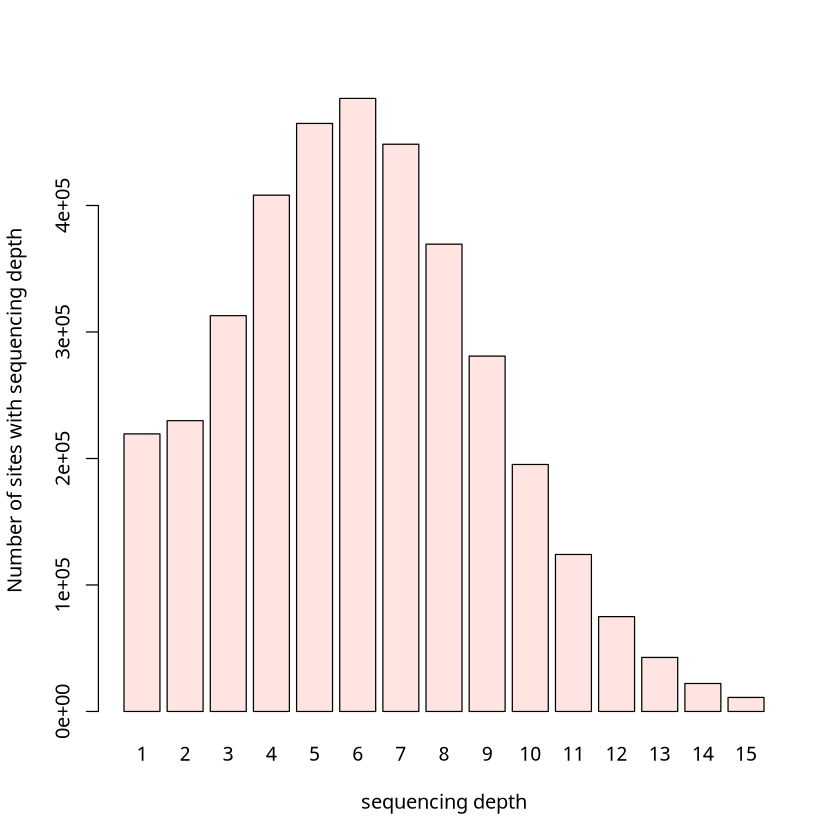

In [21]:
depth <- read.table("dep1")
d <- 1:15 #chosen depths to plot

barplot(depth[d+1,1],names=d,xlab="sequencing depth",ylab="Number of sites with sequencing depth ",col="mistyrose")


 - How do you think the depth will affect genotype and variant calling?
 


 
 # Bonus exercise (Only do this part if you have finished the rest) 
 ## Bonus exercise -  duplicated reads using Picardtools
 
 bwa actually fills in the mate information, but not all aligners do that, so we can run picard tools to fill in the mate information and sort the file according to position. We will output the file in the binary version of SAM which is BAM

In [22]:

java -jar ${TOOL_PATH}/picard.jar FixMateInformation INPUT=CTauTzS_8872.sam \
OUTPUT=id.fixmate.srt.bam SORT_ORDER=coordinate

INFO	2025-07-26 11:49:52	FixMateInformation	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** 
https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    FixMateInformation -INPUT CTauTzS_8872.sam -OUTPUT id.fixmate.srt.bam -SORT_ORDER coordinate
**********


11:49:52.951 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/student/opt/anders/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Sat Jul 26 11:49:52 CST 2025] FixMateInformation INPUT=[CTauTzS_8872.sam] OUTPUT=id.fixmate.srt.bam SORT_ORDER=coordinate    ASSUME_SORTED=false ADD_MATE_CIGAR=true IGNORE_MISSING_MATES=true VERBOSITY=INFO QUIET=false VALIDATION_STRINGENCY=STRICT COMPRESSION_LEVEL=5 MAX_RECORDS_IN_RAM=500000 CREATE_INDEX=false CREATE_MD5_FILE=false USE_JDK_DEFLATER=f

View the header of the BAM file

In [23]:
samtools view -H id.fixmate.srt.bam 

@HD	VN:1.6	SO:coordinate	GO:query
@SQ	SN:NC_030808.1	LN:157403528
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.19-r1273	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 goat.fa.gz CCTauTzS_8872.Goat.small.fq_1.gz CCTauTzS_8872.Goat.small.fq_2.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.22.1	CL:samtools view -H id.fixmate.srt.bam
(anders) 


picard didn't update the PG flag, so let us update the header information so that we have documented how we modified the file.

In [24]:

(samtools view -H id.fixmate.srt.bam;echo -e "@PG\tID:fixmate\tPN:fixmate\tVN:2.60\tCL:stuff" ) >newhd
samtools reheader newhd id.fixmate.srt.bam > id.fixmate.srt2.bam

(anders) (anders) 


 - Validate that the header in file id.fixmate.srt2.bam  has been updated

In [25]:
samtools view -H id.fixmate.srt2.bam 

@HD	VN:1.6	SO:coordinate	GO:query
@SQ	SN:NC_030808.1	LN:157403528
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.19-r1273	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 goat.fa.gz CCTauTzS_8872.Goat.small.fq_1.gz CCTauTzS_8872.Goat.small.fq_2.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.22.1	CL:samtools view -H id.fixmate.srt.bam
@PG	ID:fixmate	PN:fixmate	VN:2.60	CL:stuff
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.22.1	CL:samtools reheader newhd id.fixmate.srt.bam
@PG	ID:samtools.2	PN:samtools	PP:samtools.1	VN:1.22.1	CL:samtools view -H id.fixmate.srt2.bam
(anders) 


Now mark duplicates using picard

In [26]:

java -jar ${TOOL_PATH}/picard.jar MarkDuplicates I=id.fixmate.srt2.bam \
O=id.fixmate.srt.md.bam  M=metrics;

INFO	2025-07-26 11:49:57	MarkDuplicates	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** 
https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    MarkDuplicates -I id.fixmate.srt2.bam -O id.fixmate.srt.md.bam -M metrics
**********


11:49:57.878 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/student/opt/anders/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Sat Jul 26 11:49:57 CST 2025] MarkDuplicates INPUT=[id.fixmate.srt2.bam] OUTPUT=id.fixmate.srt.md.bam METRICS_FILE=metrics    MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP=50000 MAX_FILE_HANDLES_FOR_READ_ENDS_MAP=8000 SORTING_COLLECTION_SIZE_RATIO=0.25 TAG_DUPLICATE_SET_MEMBERS=false REMOVE_SEQUENCING_DUPLICATES=false TAGGING_POLICY=DontTag CLEAR_DT=true DUPLEX_UMI=false FLOW_MODE=

 - Did picard update the PG flag of the header?
 - Did picard update anything else in the header?

NB you can view the header of a bamfile using 'samtools view -H'




In [27]:
samtools view -H id.fixmate.srt.md.bam

@HD	VN:1.6	SO:coordinate	GO:query
@SQ	SN:NC_030808.1	LN:157403528
@RG	ID:foo	SM:bar	LB:library1
@PG	ID:bwa	PN:bwa	VN:0.7.19-r1273	CL:bwa mem -R @RG\tID:foo\tSM:bar\tLB:library1 -t 5 goat.fa.gz CCTauTzS_8872.Goat.small.fq_1.gz CCTauTzS_8872.Goat.small.fq_2.gz
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.22.1	CL:samtools view -H id.fixmate.srt.bam
@PG	ID:fixmate	PN:fixmate	VN:2.60	CL:stuff
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.22.1	CL:samtools reheader newhd id.fixmate.srt.bam
@PG	ID:MarkDuplicates	VN:3.4.0	CL:MarkDuplicates INPUT=[id.fixmate.srt2.bam] OUTPUT=id.fixmate.srt.md.bam METRICS_FILE=metrics    MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP=50000 MAX_FILE_HANDLES_FOR_READ_ENDS_MAP=8000 SORTING_COLLECTION_SIZE_RATIO=0.25 TAG_DUPLICATE_SET_MEMBERS=false REMOVE_SEQUENCING_DUPLICATES=false TAGGING_POLICY=DontTag CLEAR_DT=true DUPLEX_UMI=false FLOW_MODE=false FLOW_DUP_STRATEGY=FLOW_QUALITY_SUM_STRATEGY FLOW_USE_END_IN_UNPAIRED_READS=false FLOW_USE_UNPAIRED_CLIPPED_END=false FLOW_UNPAIRED_



## Bonus exercise 3 - clean you bam files using the FLAGS column

The second column in the SAM format is the very important FLAG. This will tell tell you about the state of the paired end mapping, QC duplicates etc.


  
Using the samtools -F/-f you can discard/include flags that fulfill certain patterns. See http://broadinstitute.github.io/picard/explain-flags.html .

  1. How many reads have we marked as duplicate in the final file.
  2. How many properly mapped read pairs do we have? (Where both reads map to the same chr etc).
  3. How many mapped reads do we have ?
  4. How many unmapped reads do we have ?
  5. Find the distribution of the RNAMES of the unmapped reads!?

 Run the following command one at a time by uncommenting them (i.e. remove the # in front)

In [28]:

#samtools view -f 1024 id.fixmate.srt.md.bam|wc -l
#samtools view -f 2 id.fixmate.srt.md.bam|wc -l
#samtools view -F 4 id.fixmate.srt.md.bam|wc -l
#samtools view -f 4 id.fixmate.srt.md.bam|wc -l
#samtools view -f 4 id.fixmate.srt.md.bam|cut -f3|sort -n |uniq -c


(anders) (anders) (anders) (anders) (anders) 


Compare with "samtools flagstat" command 


In [29]:
samtools flagstat id.fixmate.srt.md.bam


168472 + 0 in total (QC-passed reads + QC-failed reads)
167012 + 0 primary
0 + 0 secondary
1460 + 0 supplementary
2 + 0 duplicates
2 + 0 primary duplicates
168472 + 0 mapped (100.00% : N/A)
167012 + 0 primary mapped (100.00% : N/A)
167012 + 0 paired in sequencing
83506 + 0 read1
83506 + 0 read2
165216 + 0 properly paired (98.92% : N/A)
167012 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
(anders) 


Make a new bamfile, where you only include the reads where both ends maps, and filter out those with a mapping quality below 10, and removing duplicates


In [30]:
samtools view -f 2 -F 1024 id.fixmate.srt.md.bam -q 10 >new.bam

(anders) 


In [31]:
# type your code here

(anders) 
